In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import progressbar
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
data_class1 = np.load('/content/drive/MyDrive/D22180_CS669/Group01_Assignment1_code/Group01/NLS_Group01/class1train_data.npy')
data_class2 = np.load('/content/drive/MyDrive/D22180_CS669/Group01_Assignment1_code/Group01/NLS_Group01/class2train_data.npy')
data_class3 = np.load('/content/drive/MyDrive/D22180_CS669/Group01_Assignment1_code/Group01/NLS_Group01/class3train_data.npy')
data_test1   = np.load('/content/drive/MyDrive/D22180_CS669/Group01_Assignment1_code/Group01/NLS_Group01/class1test_data.npy')
data_test2   = np.load('/content/drive/MyDrive/D22180_CS669/Group01_Assignment1_code/Group01/NLS_Group01/class2test_data.npy')
data_test3   = np.load('/content/drive/MyDrive/D22180_CS669/Group01_Assignment1_code/Group01/NLS_Group01/class3test_data.npy')
data = []

In [3]:
def func_G(x,cov, mean,p=1/3):
    inv_cov = np.linalg.pinv(cov)
    g = -0.5*np.matmul(np.matmul((x-mean),(inv_cov)),((x-mean).T))-0.5*(np.log(np.linalg.det(cov)))+np.log(p)-np.log(2.0*np.pi)
    if(isinstance(g,np.ndarray)):
        return g.diagonal()
    else:
        return g

In [4]:
def find_mean(data):
    return [np.sum(data[:,0])/data.shape[0],np.sum(data[:,1])/data.shape[0]]

def find_covariance(data, mean):
    a = []
    varx = (np.sum(data[:,0]**2)/data.shape[0])-(mean[0]**2)
    vary = (np.sum(data[:,1]**2)/data.shape[0])-(mean[1]**2)
    varxy = (np.sum(data[:,0]*data[:,1])/data.shape[0])-(mean[0]*mean[1])
    a = [[varx,varxy],[varxy,vary]]
    a = np.array(a)

    return a

In [5]:
def get_confusion_mat(classes, il=None,jl=None, kl=None):

    lis = []
    if((il != None) and (jl!=None) and (kl!=None)):
        conf_mat = np.full((3,3),1e-10)
        for i in range(data_test1.shape[0]):
            lis.append(0)
        for i in range(data_test2.shape[0]):
            lis.append(1)
        for i in range(data_test3.shape[0]):
            lis.append(2)
        for i in range(len(classes)):
            conf_mat[lis[i]][classes[i]]+=1
        return np.array(conf_mat)
    else:
        conf_mat = np.full((2,2),1e-10)
        if(il==1 and jl==2):
            for i in range(data_test1.shape[0]):
                lis.append(0)
            for i in range(data_test2.shape[0]):
                lis.append(1)
        if(il==1 and jl==3):
            for i in range(data_test1.shape[0]):
                lis.append(0)
            for i in range(data_test3.shape[0]):
                lis.append(1)
        if(il==2 and jl==3):
            for i in range(data_test2.shape[0]):
                lis.append(0)
            for i in range(data_test3.shape[0]):
                lis.append(1)

        for i in range(len(classes)):
            conf_mat[lis[i]][classes[i]]+=1

        return np.array(conf_mat)

In [6]:
def metric(conf_matrix):
    x = conf_matrix.shape[0]
    precision = []
    accuracy = []
    recall = []
    f_measure = []
    total_sum = np.sum(conf_matrix)
    for i in range(x):
        TP = conf_matrix[i][i]
        FN = np.sum(conf_matrix[i,:])-conf_matrix[i][i]
        FP = np.sum(conf_matrix[:,i])-conf_matrix[i][i]
        TN = total_sum-(TP+FP+FN)

        recal = TP/(TP+FN)
        preci = TP/(TP+FP)
        acc = (TP+TN)/(TP+TN+FP+FN)

        precision.append(preci)
        recall.append(recal)
        accuracy.append(acc)
        f_measure.append((2*recal*preci)/(recal+preci))

    return accuracy,precision,recall,f_measure

In [7]:
def find_range(data1, data2, data3, test):

    minx = np.min(data1[:,0])
    minx = min(minx, np.min(data2[:,0]))
    minx = min(minx, np.min(data3[:,0]))

    miny = np.min(data1[:,1])
    miny = min(miny, np.min(data2[:,1]))
    miny = min(miny, np.min(data3[:,1]))

    maxx = np.max(data1[:,0])
    maxx = max(maxx, np.max(data2[:,0]))
    maxx = max(maxx, np.max(data3[:,0]))

    maxy = np.min(data1[:,1])
    maxy = max(maxy, np.max(data2[:,1]))
    maxy = max(maxy, np.max(data3[:,1]))
    scalex = maxx-minx
    scaley = maxy-miny
    return minx-5, miny-5, maxx+5, maxy+5


In [9]:
def pair_plot(data, dc1, dc2,cov1, cov2, mean1, mean2, il, jl):
    dat_blue = []
    dat_red = []
    dict_={1:'violet',2:'pink',3:'oldlace'}
    dict_2 = {3:'red',1:'blue',2:'green'}
    patch1 = mpatches.Patch(color=dict_[il], label='class{}'.format(il))
    patch2 = mpatches.Patch(color=dict_[jl], label='class{}'.format(jl))
    for i in (range(data.shape[0])):
        g1 = func_G(data[i],cov1,mean1)
        g2 = func_G(data[i],cov2,mean2)
        if(np.argmax([g1,g2])==0):
            dat_red.append([data[i][0],data[i][1]])
        elif(np.argmax([g1,g2])==1):
            dat_blue.append([data[i][0],data[i][1]])

    dat_blue = np.array(dat_blue)
    dat_red = np.array(dat_red)
    fig, ax = plt.subplots()
    ax = plt.scatter(dat_blue[:,0], dat_blue[:,1], s=2, c=dict_[jl])
    ax = plt.scatter(dat_red[:,0], dat_red[:,1], s=2, c=dict_[il])
    ax = plt.legend(handles=[patch2,patch1])
    ax = plt.scatter(dc1[:,0], dc1[:,1], s=2, c=dict_2[il])
    ax = plt.scatter(dc2[:,0], dc2[:,1], s=2, c=dict_2[jl])
    plt.show()

    data_test = []
    if(il==1 or jl==1):
        for i in range(data_test1.shape[0]):
            data_test.append([data_test1[i][0],data_test1[i][1]])
    if(il==2 or jl==2):
        for i in range(data_test2.shape[0]):
            data_test.append([data_test2[i][0],data_test2[i][1]])
    if(il==3 or jl==3):
        for i in range(data_test3.shape[0]):
            data_test.append([data_test3[i][0],data_test3[i][1]])

    data_test = np.array(data_test)
    g1 = func_G(data_test, cov1, mean1)
    g2 = func_G(data_test, cov2, mean2)


    classes = []
    for i in range(data_test.shape[0]):
        classes.append(np.argmax([g1[i],g2[i]]))

    conf_mat = get_confusion_mat(classes, il,jl)
    print("Confusion Matrix")
    print(conf_mat)
    temp = np.array(metric(conf_mat))
    print("Accuracy: ",temp[0,:])
    print("Precision: ",temp[1,:])
    print("Recall: ",temp[2,:])
    print("F-Measure: ",temp[3,:])
    print("Mean F-Measure: ",np.mean(temp[3,:]))

def total_plot(data,cov1, cov2, cov3, mean1, mean2, mean3):

    dat_blue = []
    dat_red = []
    dat_green = []
    violet_patch = mpatches.Patch(color='violet', label='class1')
    pink_patch = mpatches.Patch(color='pink', label='class2')
    oldlace_patch = mpatches.Patch(color='oldlace', label='class3')
    for i in (range(data.shape[0])):
        g1 = func_G(data[i],cov1,mean1)
        g2 = func_G(data[i],cov2,mean2)
        g3 = func_G(data[i],cov3,mean3)
        if(np.argmax([g1,g2,g3])==0):
            dat_red.append([data[i][0],data[i][1]])
        elif(np.argmax([g1,g2,g3])==1):
            dat_blue.append([data[i][0],data[i][1]])
        elif(np.argmax([g1,g2,g3])==2):
            dat_green.append([data[i][0],data[i][1]])

    dat_blue = np.array(dat_blue)
    dat_red = np.array(dat_red)
    dat_green = np.array(dat_green)

    fig, ax = plt.subplots()
    ax = plt.scatter(dat_blue[:,0], dat_blue[:,1], s=2, c='pink')
    ax = plt.scatter(dat_red[:,0], dat_red[:,1], s=2, c='violet')
    ax = plt.scatter(dat_green[:,0], dat_green[:,1], s=2, c='oldlace')
    ax = plt.legend(handles=[violet_patch,pink_patch,oldlace_patch])
    ax = plt.scatter(data_class1[:,0], data_class1[:,1], s=2, c='blue')
    ax = plt.scatter(data_class2[:,0], data_class2[:,1], s=2, c='green')
    ax = plt.scatter(data_class3[:,0], data_class3[:,1], s=2, c='red')
    plt.show()

    minx1 = (mean1[0])-10
    miny1 = (mean1[1])-10
    maxx1 = (mean1[0])+10
    maxy1 = (mean1[1])+10

    minx2 = (mean2[0])-10
    miny2 = (mean2[1])-10
    maxx2 = (mean2[0])+10
    maxy2 = (mean2[1])+10

    minx3 = (mean3[0])-10
    miny3 = (mean3[1])-10
    maxx3 = (mean3[0])+10
    maxy3 = (mean3[1])+10



    x1 = np.linspace(minx1,maxx1,500)
    y1 = np.linspace(miny1,maxy1,500)
    n1 = 500
    Z1 = np.ndarray(shape=(n1,n1),dtype=float)
    for i in range(n1):
        for j in range(n1):
            P = [[x1[i],y1[j]]]
            P = np.array(P)
            g = func_G(P,cov1,mean1)
            Z1[j][i]=np.e**g[0]
    X1, Y1 = np.meshgrid(x1,y1)

    x2 = np.linspace(minx2,maxx2,500)
    y2 = np.linspace(miny2,maxy2,500)
    n2 = 500
    Z2 = np.ndarray(shape=(n2,n2),dtype=float)
    print(cov1)
    for i in range(n2):
        for j in range(n2):
            P = [[x2[i],y2[j]]]
            P = np.array(P)
            g = func_G(P,cov2,mean2)
            Z2[j][i]=np.e**g[0]
    X2, Y2 = np.meshgrid(x2,y2)

    x3 = np.linspace(minx3,maxx3,500)
    y3 = np.linspace(miny3,maxy3,500)
    n3 = 500
    Z3 = np.ndarray(shape=(n3,n3),dtype=float)
    print(cov2)
    for i in range(n3):
        for j in range(n3):
            P = [[x3[i],y3[j]]]
            P = np.array(P)
            g = func_G(P,cov3,mean3)
            Z3[j][i]=np.e**g[0]
    X3, Y3 = np.meshgrid(x3,y3)


#     print(cov3)
    fig3, ax3 = plt.subplots()
    ax3 = plt.contour(X1, Y1, Z1, colors='black')
    ax3 = plt.contour(X2, Y2, Z2, colors='red')
    ax3 = plt.contour(X3, Y3, Z3, colors='green')
    ax3 = plt.scatter(dat_blue[:,0], dat_blue[:,1], s=2, c='pink')
    ax3 = plt.scatter(dat_red[:,0], dat_red[:,1], s=2, c='violet')
    ax3 = plt.scatter(dat_green[:,0], dat_green[:,1], s=2, c='oldlace')
    ax3 = plt.legend(handles=[violet_patch,pink_patch,oldlace_patch])
    ax3 = plt.scatter(data_class1[:,0], data_class1[:,1], s=2, c='blue')
    ax3 = plt.scatter(data_class2[:,0], data_class2[:,1], s=2, c='green')
    ax3 = plt.scatter(data_class3[:,0], data_class3[:,1], s=2, c='red')
    plt.show()

    data_test = []
    for i in range(data_test1.shape[0]):
        data_test.append([data_test1[i][0],data_test1[i][1]])
    for i in range(data_test2.shape[0]):
        data_test.append([data_test2[i][0],data_test2[i][1]])
    for i in range(data_test3.shape[0]):
        data_test.append([data_test3[i][0],data_test3[i][1]])

    data_test = np.array(data_test)

    g1 = func_G(data_test, cov1, mean1)
    g2 = func_G(data_test, cov2, mean2)
    g3 = func_G(data_test, cov3, mean3)


    classes = []
    for i in range(data_test.shape[0]):
        classes.append(np.argmax([g1[i],g2[i],g3[i]]))

    conf_mat = get_confusion_mat(classes,1,2,3)
    print(conf_mat)
    temp = np.array(metric(conf_mat))
    print("Accuracy: ",temp[0,:])
    print("Precision: ",temp[1,:])
    print("Recall: ",temp[2,:])
    print("F-Measure: ",temp[3,:])
    print("Mean F-Measure: ",np.mean(temp[3,:]))


In [10]:
data_test = []
for i in range(data_test1.shape[0]):
    data_test.append([data_test1[i][0],data_test1[i][1]])
for i in range(data_test2.shape[0]):
    data_test.append([data_test2[i][0],data_test2[i][1]])
for i in range(data_test3.shape[0]):
    data_test.append([data_test3[i][0],data_test3[i][1]])

data_test = np.array(data_test)
minx, miny, maxx,maxy = find_range(data_class1, data_class2, data_class3, data_test)
print(minx,miny,maxx,maxy)
data = []
for i in np.arange(minx,maxx,1e-1):
    for j in np.arange(miny,maxy,1e-1):
        data.append([i,j])
data = np.array(data)
print(data.shape[0])

-10.525762 -10.548362000000001 10.556737 10.592032
44732


In [11]:
mean11 = find_mean(data_class1)
mean22 = find_mean(data_class2)
mean33 = find_mean(data_class3)
mean11 = np.array(mean11)
mean22 = np.array(mean22)
mean33 = np.array(mean33)

cov11 = find_covariance(data_class1, mean11)
cov22 = find_covariance(data_class2, mean22)
cov33 = find_covariance(data_class3, mean33)
cov11 = np.array(cov11)
cov22 = np.array(cov22)
cov33 = np.array(cov33)

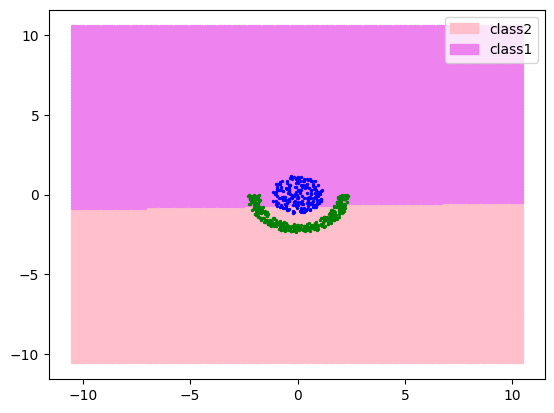

Confusion Matrix
[[ 70.  20.]
 [ 44. 106.]]
Accuracy:  [0.73333333 0.73333333]
Precision:  [0.61403509 0.84126984]
Recall:  [0.77777778 0.70666667]
F-Measure:  [0.68627451 0.76811594]
Mean F-Measure:  0.7271952259160765


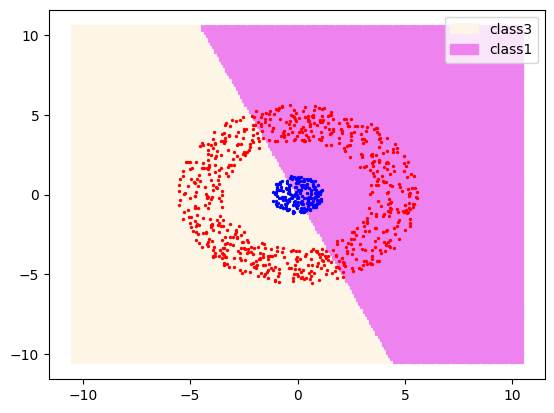

Confusion Matrix
[[ 46.  44.]
 [173. 127.]]
Accuracy:  [0.44358974 0.44358974]
Precision:  [0.21004566 0.74269006]
Recall:  [0.51111111 0.42333333]
F-Measure:  [0.29773463 0.53927813]
Mean F-Measure:  0.4185063797333817


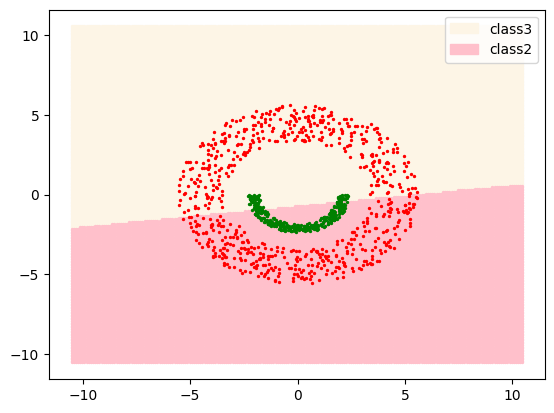

Confusion Matrix
[[113.  37.]
 [143. 157.]]
Accuracy:  [0.6 0.6]
Precision:  [0.44140625 0.80927835]
Recall:  [0.75333333 0.52333333]
F-Measure:  [0.55665025 0.63562753]
Mean F-Measure:  0.5961388883348129


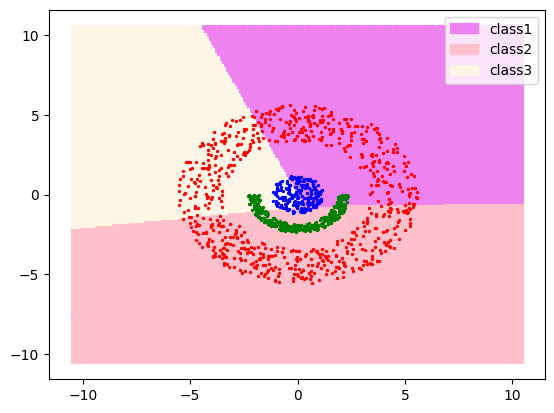

[[4.15423545 0.        ]
 [0.         4.15423545]]
[[4.15423545 0.        ]
 [0.         4.15423545]]


In [ ]:
#Case1: When all class have same diagonal covariance matrix

var_avg = (cov11[0][0]+cov22[0][0]+cov33[0][0]+cov11[1][1]+cov22[1][1]+cov33[1][1])/6
cov_new = [[var_avg,0],
           [0,var_avg]]

cov_new = np.array(cov_new)
pair_plot(data, data_class1, data_class2, cov_new, cov_new, mean11, mean22,1,2)
pair_plot(data, data_class1, data_class3, cov_new, cov_new, mean11, mean33,1,3)
pair_plot(data, data_class2, data_class3, cov_new, cov_new, mean22, mean33,2,3)

total_plot(data, cov_new, cov_new, cov_new, mean11, mean22, mean33)

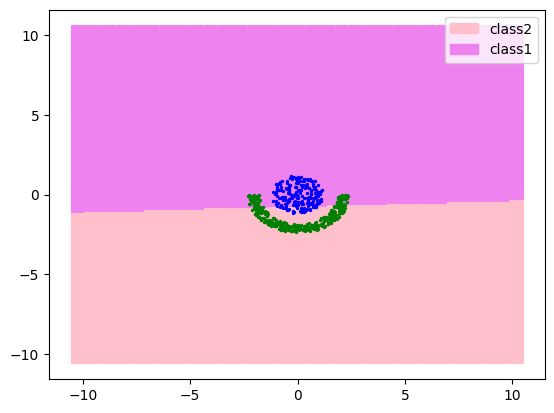

Confusion Matrix
[[ 70.  20.]
 [ 44. 106.]]
Accuracy:  [0.73333333 0.73333333]
Precision:  [0.61403509 0.84126984]
Recall:  [0.77777778 0.70666667]
F-Measure:  [0.68627451 0.76811594]
Mean F-Measure:  0.7271952259160765


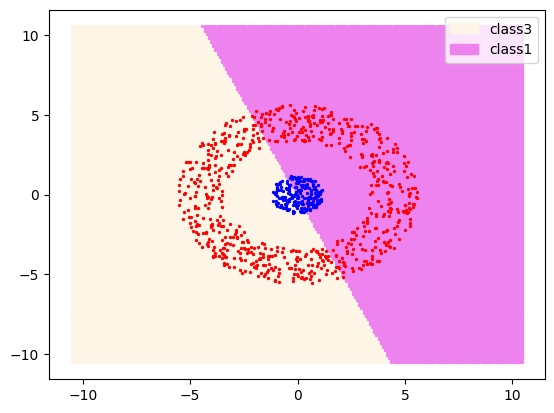

Confusion Matrix
[[ 46.  44.]
 [173. 127.]]
Accuracy:  [0.44358974 0.44358974]
Precision:  [0.21004566 0.74269006]
Recall:  [0.51111111 0.42333333]
F-Measure:  [0.29773463 0.53927813]
Mean F-Measure:  0.4185063797333817


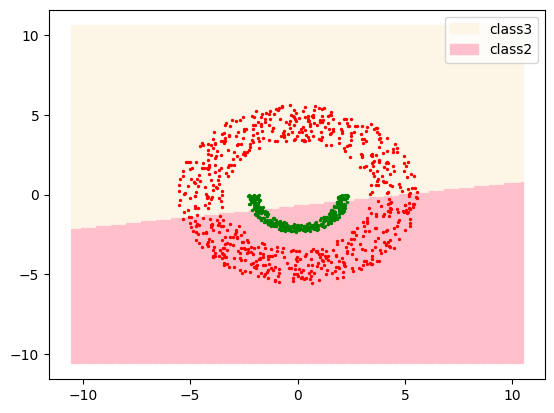

Confusion Matrix
[[116.  34.]
 [142. 158.]]
Accuracy:  [0.60888889 0.60888889]
Precision:  [0.4496124  0.82291667]
Recall:  [0.77333333 0.52666667]
F-Measure:  [0.56862745 0.64227642]
Mean F-Measure:  0.6054519368722184


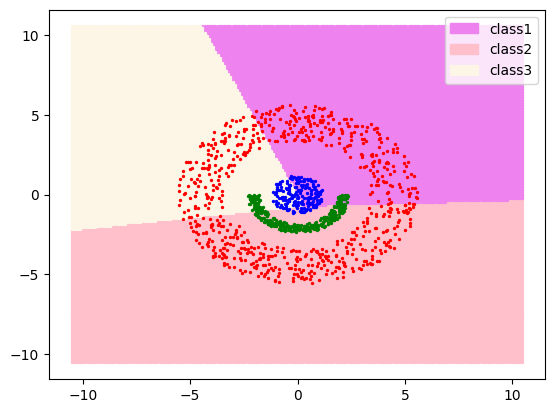

[[4.18400991 0.05815514]
 [0.05815514 4.12446098]]
[[4.18400991 0.05815514]
 [0.05815514 4.12446098]]


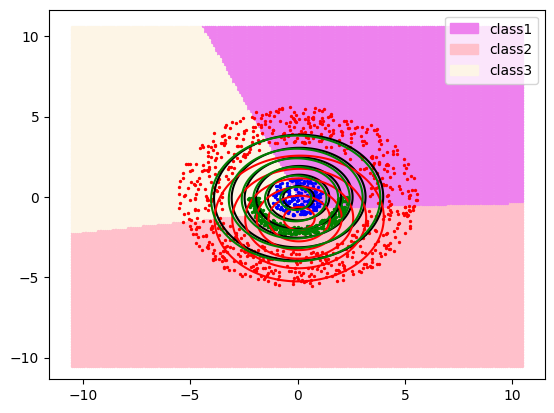

[[ 39.  19.  32.]
 [ 21. 105.  24.]
 [107. 138.  55.]]
Accuracy:  [0.66851852 0.62592593 0.44259259]
Precision:  [0.23353293 0.40076336 0.4954955 ]
Recall:  [0.43333333 0.7        0.18333333]
F-Measure:  [0.30350195 0.50970874 0.2676399 ]
Mean F-Measure:  0.36028352868855906


In [13]:
#Case2: When all class have same covariance matrix

cov_new = np.add(np.add(cov11,cov22),cov33)/3
pair_plot(data, data_class1, data_class2, cov_new, cov_new, mean11, mean22,1,2)
pair_plot(data, data_class1, data_class3, cov_new, cov_new, mean11, mean33,1,3)
pair_plot(data, data_class2, data_class3, cov_new, cov_new, mean22, mean33,2,3)

total_plot(data, cov_new, cov_new, cov_new, mean11, mean22, mean33)

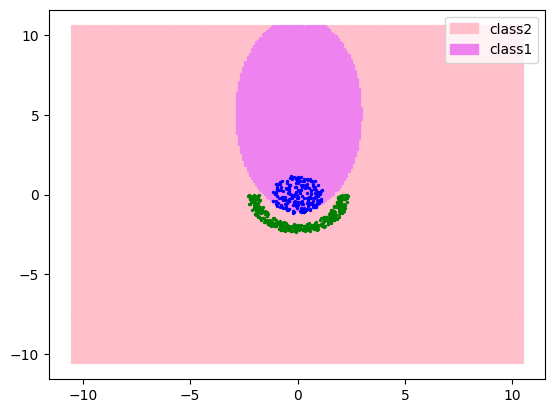

Confusion Matrix
[[7.8e+01 1.2e+01]
 [1.0e-10 1.5e+02]]
Accuracy:  [0.95 0.95]
Precision:  [1.         0.92592593]
Recall:  [0.86666667 1.        ]
F-Measure:  [0.92857143 0.96153846]
Mean F-Measure:  0.945054945054139


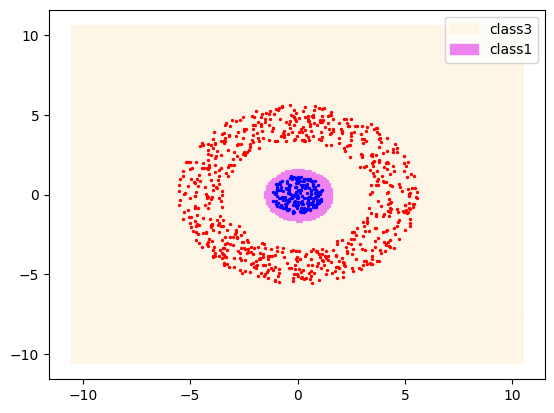

Confusion Matrix
[[9.e+01 1.e-10]
 [1.e-10 3.e+02]]
Accuracy:  [1. 1.]
Precision:  [1. 1.]
Recall:  [1. 1.]
F-Measure:  [1. 1.]
Mean F-Measure:  0.9999999999992778


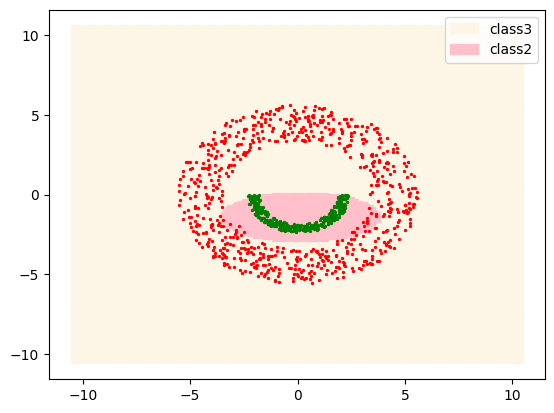

Confusion Matrix
[[143.   7.]
 [  8. 292.]]
Accuracy:  [0.96666667 0.96666667]
Precision:  [0.94701987 0.97658863]
Recall:  [0.95333333 0.97333333]
F-Measure:  [0.95016611 0.97495826]
Mean F-Measure:  0.9625621883644251


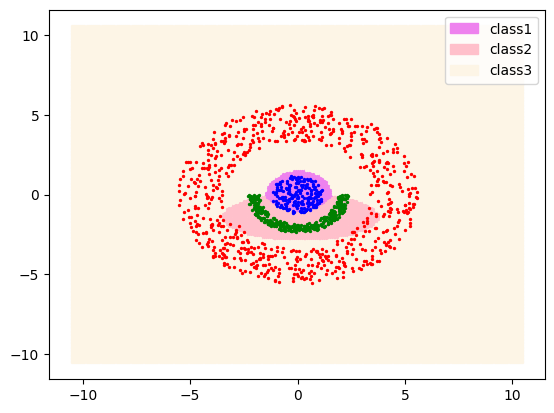

[[0.36275617 0.        ]
 [0.         0.37470118]]
[[2.20407609 0.        ]
 [0.         0.47013021]]


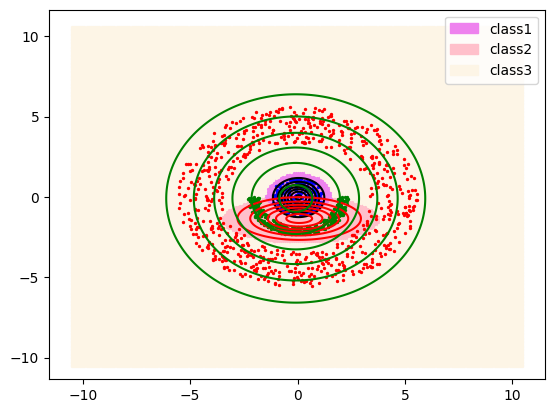

[[7.80e+01 1.20e+01 1.00e-10]
 [1.00e-10 1.43e+02 7.00e+00]
 [1.00e-10 8.00e+00 2.92e+02]]
Accuracy:  [0.97777778 0.95       0.97222222]
Precision:  [1.         0.87730061 0.97658863]
Recall:  [0.86666667 0.95333333 0.97333333]
F-Measure:  [0.92857143 0.91373802 0.97495826]
Mean F-Measure:  0.9390892371699439


In [14]:
#Case3: When all class have different covariance matrix but diagonal
cov1_new = np.copy(cov11)
cov2_new = np.copy(cov22)
cov3_new = np.copy(cov33)
cov1_new[0][1]=0
cov1_new[1][0]=0
cov2_new[0][1]=0
cov2_new[1][0]=0
cov3_new[0][1]=0
cov3_new[1][0]=0

pair_plot(data, data_class1, data_class2, cov1_new, cov2_new, mean11, mean22,1,2)
pair_plot(data, data_class1, data_class3, cov1_new, cov3_new, mean11, mean33,1,3)
pair_plot(data, data_class2, data_class3, cov2_new, cov3_new, mean22, mean33,2,3)

total_plot(data, cov1_new, cov2_new, cov3_new, mean11, mean22, mean33)




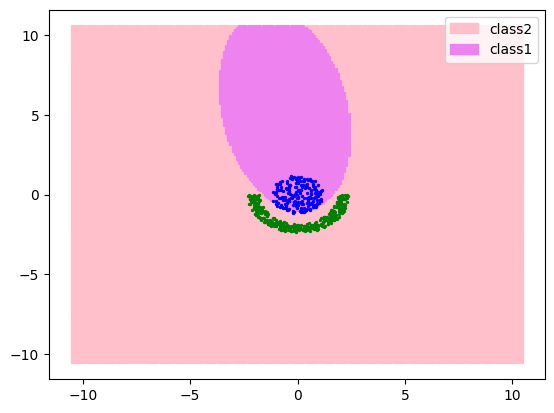

Confusion Matrix
[[7.9e+01 1.1e+01]
 [1.0e-10 1.5e+02]]
Accuracy:  [0.95416667 0.95416667]
Precision:  [1.         0.93167702]
Recall:  [0.87777778 1.        ]
F-Measure:  [0.93491124 0.96463023]
Mean F-Measure:  0.9497707338411546


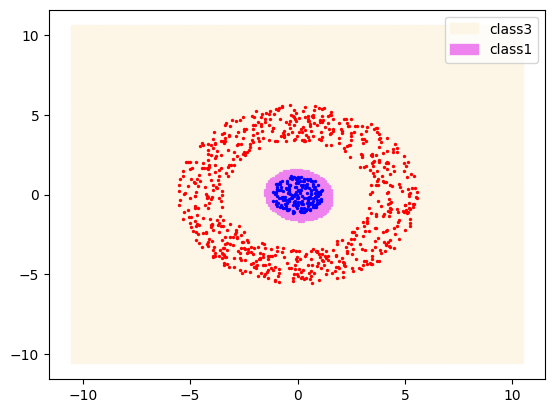

Confusion Matrix
[[9.e+01 1.e-10]
 [1.e-10 3.e+02]]
Accuracy:  [1. 1.]
Precision:  [1. 1.]
Recall:  [1. 1.]
F-Measure:  [1. 1.]
Mean F-Measure:  0.9999999999992778


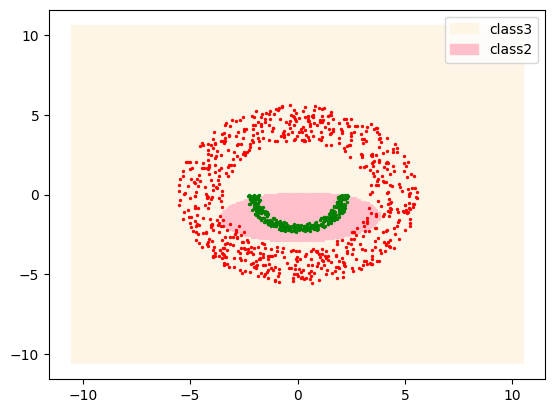

Confusion Matrix
[[144.   6.]
 [  9. 291.]]
Accuracy:  [0.96666667 0.96666667]
Precision:  [0.94117647 0.97979798]
Recall:  [0.96 0.97]
F-Measure:  [0.95049505 0.97487437]
Mean F-Measure:  0.962684710681667


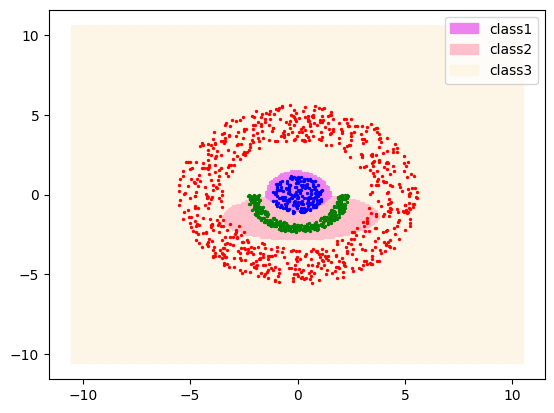

[[ 0.36275617 -0.03199842]
 [-0.03199842  0.37470118]]
[[2.20407609 0.04098767]
 [0.04098767 0.47013021]]


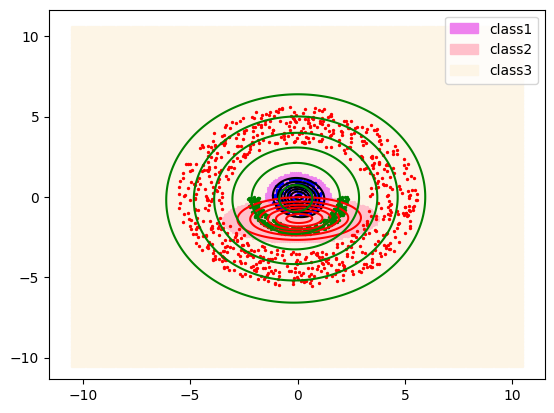

[[7.90e+01 1.10e+01 1.00e-10]
 [1.00e-10 1.44e+02 6.00e+00]
 [1.00e-10 9.00e+00 2.91e+02]]
Accuracy:  [0.97962963 0.95185185 0.97222222]
Precision:  [1.         0.87804878 0.97979798]
Recall:  [0.87777778 0.96       0.97      ]
F-Measure:  [0.93491124 0.91719745 0.97487437]
Mean F-Measure:  0.9423276888960833


In [15]:
#Case4: When all class have different covariance matrix

pair_plot(data, data_class1, data_class2, cov11, cov22, mean11, mean22,1,2)
pair_plot(data, data_class1, data_class3, cov11, cov33, mean11, mean33,1,3)
pair_plot(data, data_class2, data_class3, cov22, cov33, mean22, mean33,2,3)

total_plot(data, cov11, cov22, cov33, mean11, mean22, mean33)